### Load and import of risk free rate data

In this notebook i develop the code needed for importing the risk free rate data found on:
https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2021

The files for 2020-2024 are downloaded and stored on path: "/Users/sebastianbech/Desktop/Seminar - Asset prices and financial markets/Code/Data/US yield curves"

In [34]:
# Import needed packages
import yfinance as yf
import pandas as pd
import glob
import os

# Set path of data folder
dataFolder = "/Users/sebastianbech/Desktop/Seminar - Asset prices and financial markets/Code/Data"

# List of all txt files in data folder
dataFiles = glob.glob(os.path.join(dataFolder + '/US yield curves', "*.csv")) 

# Read all datafiles into separate dataframes
dataFiles_df = (pd.read_csv(file, low_memory=False, parse_dates = ['Date']) for file in dataFiles)

# Concat dataframes for all data files into one dataframe
yield_curves = (pd.concat(dataFiles_df, ignore_index=True)
                .convert_dtypes()
                .set_index('Date')
                .sort_index()
                .interpolate(axis=1)
              )

### Descriptive analysis of data

Todo:
- Check number of days matches us business days (check obs versus days in us calendar)
- Summarize data (Min, max etc)?

<Axes: xlabel='Date'>

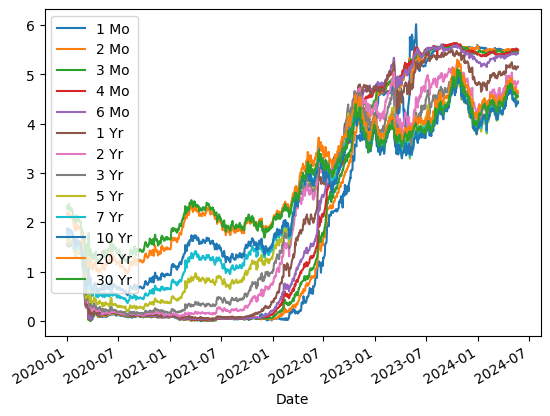

In [44]:
yield_curves.plot()

<Axes: xlabel='Date'>

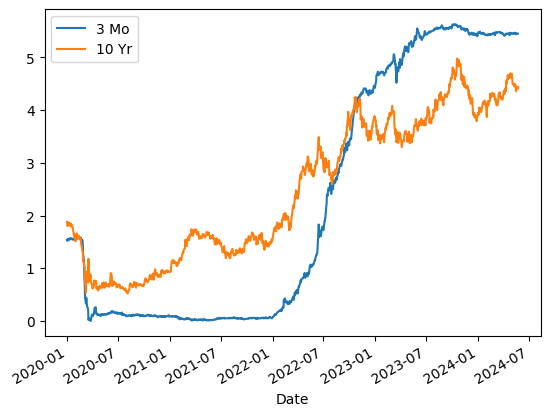

In [46]:
option_df[['3 Mo', '10 Yr']].plot()